## Importing the libraries

In [39]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text  import CountVectorizer

## Importing the Data

In [3]:
df = pd.read_csv(r"C:\Users\anees\Data Analysis\Machine Learing\ML Data\spam.csv")

In [4]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.shape

(5572, 2)

## Ham_Words

In [16]:
#!pip install WordCloud

In [ ]:
#from wordcloud import WordCloud
#import matplotlib.pyplot as plt

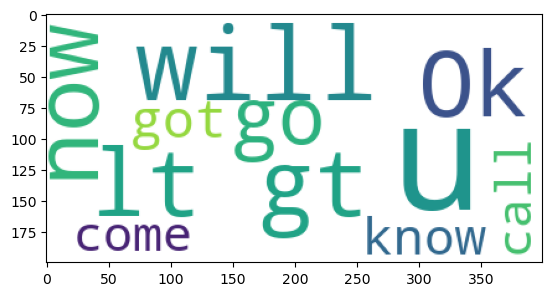

In [30]:
ham_words = " ".join(df[df["Category"] == "ham"]["Message"].values)
ham_plot = WordCloud(max_words=10,background_color="white").generate(ham_words)
plt.imshow(ham_plot)

## Spam_Words

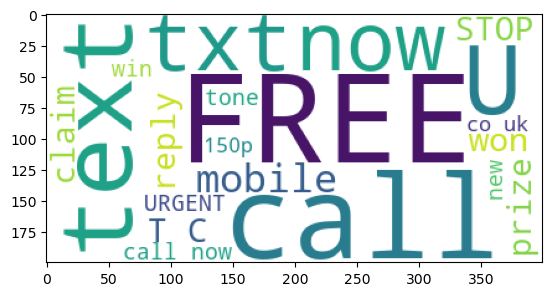

In [33]:
spam_words = " ".join(df[df["Category"] == "spam"]["Message"].values)
spam_plot = WordCloud(max_font_size=100,
                      max_words=20,
                      background_color="white").generate(spam_words)
plt.imshow(spam_plot)

<Axes: xlabel='Category'>

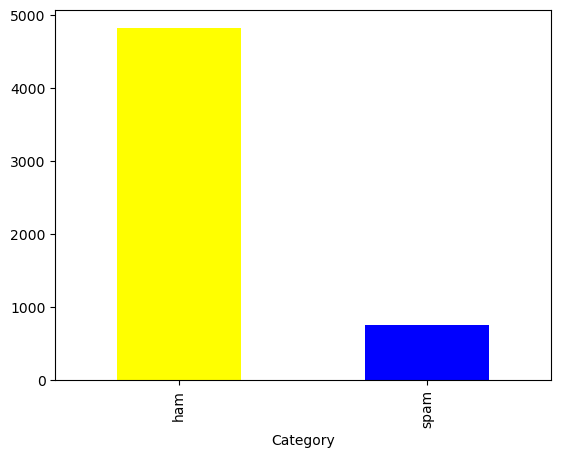

In [36]:
df["Category"].value_counts().plot(kind="bar",color = ["Yellow","blue"])

In [37]:
X = df.drop("Category",axis = 1)

## Bag Of Words

In [38]:
#from sklearn.feature_extraction.text  import CountVectorizer

In [40]:
bow =CountVectorizer(stop_words="english")

In [45]:
bow.fit(df["Message"])
X = bow.transform(df["Message"]).toarray()
y = df["Category"]   # separate the input and output

In [46]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_text,y_train,y_text = train_test_split(X,y,test_size = 0.2,random_state=24)

## KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [52]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_text)
accuracy_score(y_text,y_pred)

0.9112107623318386

## Naive Bayes

In [53]:
from sklearn.naive_bayes import MultinomialNB

In [54]:
nb = MultinomialNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_text)
accuracy_score(y_text,y_pred)

0.979372197309417

In [63]:
import pickle

In [64]:
pickle.dump(nb,open("model.pkl","wb"))

In [66]:
pickle.dump(bow,open("model1.pkl","wb"))

In [65]:
model = pickle.load(open("model.pkl","rb"))

In [ ]:
model.predict("I am data")

## Desicion Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
dt = MultinomialNB()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_text)
accuracy_score(y_text,y_pred)

0.979372197309417

## Linear Classification

In [ ]:
from sklearn.linear_model import L

## Deployement

In [62]:
email = input("Enter the email ID:  ")
data = bow.transform([email]).toarray()
nb.predict(data)[0]

Enter the email ID:  hi


'ham'